Golden function resault: -1.491644193983766
fminbound function resault: -1.49164449843362
Number of steps of bitwise search method: 25210
[-2.5     -2.49999 -2.49998 ... -1.00003 -1.00002 -1.00001]


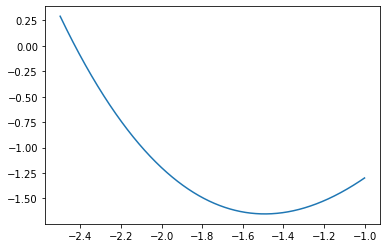

bitwise search method resault:  -1.4916500000017672
chord method resault:  -2.427111116720829
[-2.5     -2.49999 -2.49998 ... -1.00003 -1.00002 -1.00001]


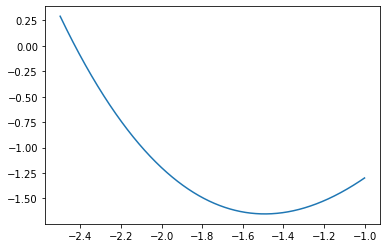

golden section method resault:  (-1.491648220968175, -1.6519820130613543)
[-2.5     -2.49999 -2.49998 ... -1.00003 -1.00002 -1.00001]


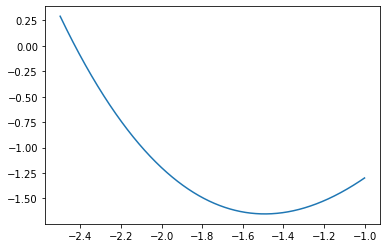

marquardt method resault:  (-1.491648220968175, -1.6519820130613543)
Number of step of broken line method:  19
[-2.5     -2.49999 -2.49998 ... -1.00003 -1.00002 -1.00001]


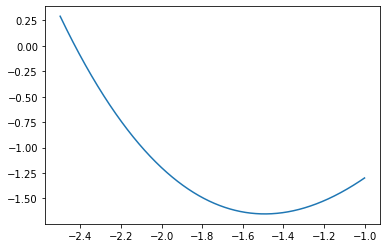

broken line method resault:  -1.4916428191442406
[-2.5     -2.49999 -2.49998 ... -1.00003 -1.00002 -1.00001]


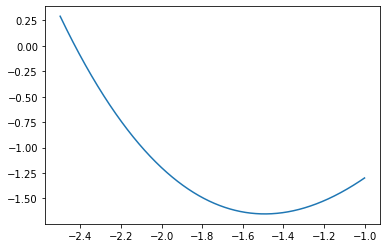

golden search method resault 7 task:  (-1.0000072336548698, 0.2012173470825221)
Newton method resault: 7.963096044106416e-10


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize


"""
    Вариан 8
    Каменьщиков АА-19-05
"""



EPS = 10**(-5)
left_border = -2.5
right_border = -1


def func(x):
    return np.exp(x) - (1/3) * x**3 + 2 * x


def func_derivative_1(x):
    return np.exp(x) - x**2 + 2


def func_derivative_2(x):
    return np.exp(x) - 2 * x


def plot(
        x,
        left_border: float = left_border,
        right_border: float = right_border,
        ):
    vector_x = np.arange(left_border, right_border, EPS)
    print(vector_x)
    vector_y_stat = [func(el) for el in vector_x]
    vector_y_x = [func(el) for el in x]
    plt.plot(vector_x, vector_y_stat)
    plt.show()


def bitwise_search_method(
        left_border: float = left_border,
        right_border: float = right_border):
    """
        Bitwise Search Method 3.2.1
    """
    stepCount = 0;
    step = 4*EPS
    x = left_border
    pointsOfApproach = []
    while np.abs(step) > EPS:
       if func(x) < func(x + step):
            step = -(step/4)
            x += step
            pointsOfApproach.append(x)
       else: 
            x+=step
            pointsOfApproach.append(x)
       stepCount+=1;
    print("Number of steps of bitwise search method:" , stepCount)
    plot(x=pointsOfApproach)
    return x


def golden_section_method(
        a: float = left_border,
        b: float = right_border):
    """
        golden section method 3.2.2
    """
    step = 4 * EPS
    tau = (np.sqrt(5) - 1) / 2
    x2 = a + tau * (b - a)
    x1 = a + b - x2
    f1 = func(x1)
    f2 = func(x2)
    point_approach = []
    while np.abs(step) > EPS: 
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + b - x1
            f1 = func(x1)
            point_approach.append(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + b - x2
            f2 = func(x2)
            point_approach.append(x1)

        step = (b - a) / 2

    x = (a + b) / 2
    point_approach.append(x)
    plot(x=point_approach)
    f = func(x)
    return x, f


def chord_method(
        left_border: float = left_border,
        right_border: float = right_border):
    """
        chord method 3.2.3
    """
    try:
        x0 = (left_border + right_border) / 2
        xn = func(x0)
        xn1 = xn - func(xn) / func_derivative_1(xn)
        while abs(xn1 - xn) > EPS:
            xn = xn1
            xn1 = xn - func(xn) / func_derivative_1(xn)
        return xn1
    except ValueError:
        print("Value not invalidate")


def marquardt_method(
        a: float = left_border,
        b: float = right_border):
    """
        Marquardt method 3.2.4
    """

    step = 4 * EPS
    tau = (np.sqrt(5) - 1) / 2
    x2 = a + tau * (b - a)
    x1 = a + b - x2
    f1 = func(x1)
    f2 = func(x2)
    point_approach = []
    while np.abs(step) > EPS: 
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + b - x1
            f1 = func(x1)
            point_approach.append(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + b - x2
            f2 = func(x2)
            point_approach.append(x1)

        step = (b - a) / 2

    x = (a + b) / 2
    point_approach.append(x)
    plot(x=point_approach)
    f = func(x)
    return x, f


def broken_line(
        left_border: float = left_border,
        right_border: float = right_border):

    """
        Broken Line method 3.2.5
    """

    step_count = 1
    point_of_approach = []
    l = np.abs(func_derivative_1(left_border))
    a = left_border
    b = right_border
    x0 = 1/(2 * l) * (func(a) - func(b) + l * (a+b))
    p0 = func(a) - l * (x0 - a)
    delta = 1/(2 * l) * (func(x0) - p0)
    point_of_approach.append(x0)


    while (2 * l * delta) > EPS:
        step_count += 1
        x1 = x0 - delta
        x2 = x0 + delta
        if func(x1) < func(x2):
            x0 = x1
        else:
            a = x0
            x0 = x2
        p0 = func(a) - l * (x0 - a)
        delta = 1 / (2 * l) * (func(x0) - p0)
        point_of_approach.append(x0)

    print('Number of step of broken line method: ', step_count)
    plot(x=np.array(point_of_approach))
    return x1


######################
#### 7
######################


def func_7(x):
    return np.exp(x) - 1 - x - np.power(x,2) / 2 - np.power (x,3) / 3 


def golden_section_method_7(
        a: float = left_border,
        b: float = right_border):
    """
        golden section method 7
    """
    step = 4 * EPS
    tau = (np.sqrt(5) - 1) / 2
    x2 = a + tau * (b - a)
    x1 = a + b - x2
    f1 = func_7(x1)
    f2 = func_7(x2)
    point_approach = []
    while np.abs(step) > EPS: 
        if f1 <= f2:
            b = x2
            x2 = x1
            f2 = f1
            x1 = a + b - x1
            f1 = func_7(x1)
            point_approach.append(x1)
        else:
            a = x1
            x1 = x2
            f1 = f2
            x2 = a + b - x2
            f2 = func_7(x2)
            point_approach.append(x1)

        step = (b - a) / 2

    x = (a + b) / 2
    point_approach.append(x)
    plot(x=point_approach)
    f = func_7(x)
    return x, f


######################
#### 8
######################


def func_newton(x):
    return x*np.arctan(x)-0.5*np.log(1+np.power(x,2))


def func_newton_derivative_1(x):
    return np.arctan(x)


def func_newton_derivative_2(x):
    return 1/(np.power(x,2)+1)


def newton_method_8_part():
    rightBorderX = -3
    leftBorderX = 5
    x = (rightBorderX + leftBorderX) / 2
    while np.abs(func_newton_derivative_1(x)) > EPS:
        x = x -  func_newton_derivative_1(x) / func_newton_derivative_2(x)
    return x


def tau_calculating(x):
    return np.power(func_newton_derivative_1(x),2) / (np.power(func_newton_derivative_1(x) , 2) + np.power(func_newton_derivative_1(x - func_newton_derivative_1(x)/func_newton_derivative_2(x)),2))


def newton_raphson_method(leftBorderX, rightBorderX):
    x = (rightBorderX - leftBorderX) / 2
    while np.abs(func_newton_derivative_1(x)) > EPS:
        x = x - tau_calculating(x) * func_newton_derivative_1(x) / func_newton_derivative_2(x)
    return x


def main():
    print(
            "Golden function resault:",
            optimize.golden(
                func,
                brack = (left_border, right_border),
                full_output=False)
    )
    print(
            "fminbound function resault:",
            optimize.fminbound(
                func,
                left_border,
                right_border)
    )
    print(
            "bitwise search method resault: ",
            bitwise_search_method()
    )
    print(
            "chord method resault: ",
            chord_method()
    )
    print(
            "golden section method resault: ",
            golden_section_method()
    )
    print(
            "marquardt method resault: ",
            marquardt_method()
    )
    print(
            "broken line method resault: ",
            broken_line()
    )
    print("golden search method resault 7 task: ", golden_section_method_7())

    print("Newton method resault:", newton_method_8_part())

    
if __name__ == '__main__':
    main()
